In [2]:
import os
import sys
sys.path.append('../src')

import zipfile
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import mode
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder

from file_handler import files_handler, header_handler

%matplotlib inline
print os.path.abspath(os.curdir)

/Users/Ahmed/Documents/DataMining_II/QxBranch/Telestra_project/jupyter


In [3]:
# Change to '/data' directory
os.chdir("..") # get out current directory
os.chdir(os.path.abspath(os.curdir)+"/data/") # get insdie '/data' directory to save data files
saved_data_dir = os.path.abspath(os.curdir)
print os.path.abspath(saved_data_dir)

/Users/Ahmed/Documents/DataMining_II/QxBranch/Telestra_project/data


## Objective

Because the seed files we created in [previous assignment](/notebooks/telstra-exploring-data.ipynb) contain very large amount of generated (added) extra features, we will in this part limit our data sets to limited number of features, by selecting the more relevant or closely related. The previous assignment was necessary to clean and organize the input data.

In [4]:
# Let's do some check here to make sure that the data frames were written in the csv seed files
train = pd.read_csv(saved_data_dir+'/train_seed_h.csv')
test = pd.read_csv(saved_data_dir+'/test_seed_h.csv')

In [5]:
print list(train.columns.values), '\n', '-'*100, '\n', list(test.columns.values)

['fault_severity', 'id', 'location', 'event_type 10', 'event_type 11', 'event_type 13', 'event_type 14', 'event_type 15', 'event_type 18', 'event_type 2', 'event_type 20', 'event_type 21', 'event_type 22', 'event_type 23', 'event_type 24', 'event_type 26', 'event_type 27', 'event_type 28', 'event_type 29', 'event_type 30', 'event_type 32', 'event_type 34', 'event_type 35', 'event_type 40', 'event_type 42', 'event_type 43', 'event_type 44', 'event_type 45', 'event_type 46', 'event_type 47', 'event_type 5', 'event_type 50', 'event_type 54', 'event_type 6', 'event_type 7', 'event_type 8', 'event_type extra_0', 'event_type extra_1', 'event_type extra_2', 'extra_type 0', 'extra_type 1', 'extra_type 2', 'feature 101', 'feature 103', 'feature 105', 'feature 109', 'feature 118', 'feature 132', 'feature 133', 'feature 134', 'feature 135', 'feature 153', 'feature 154', 'feature 155', 'feature 157', 'feature 160', 'feature 161', 'feature 163', 'feature 167', 'feature 170', 'feature 171', 'feature

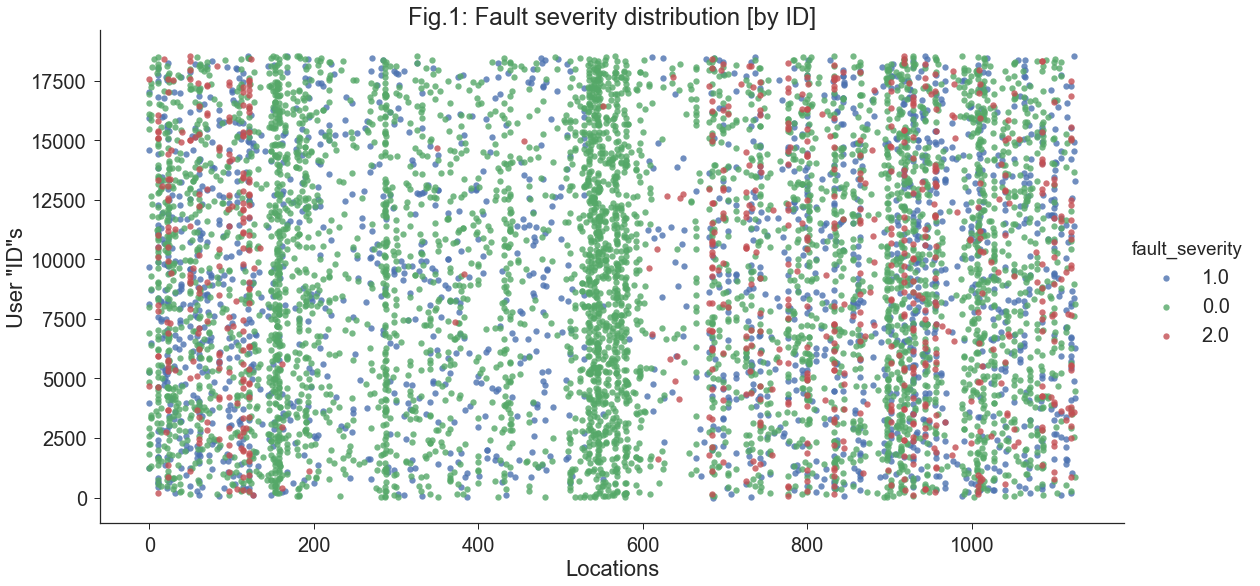

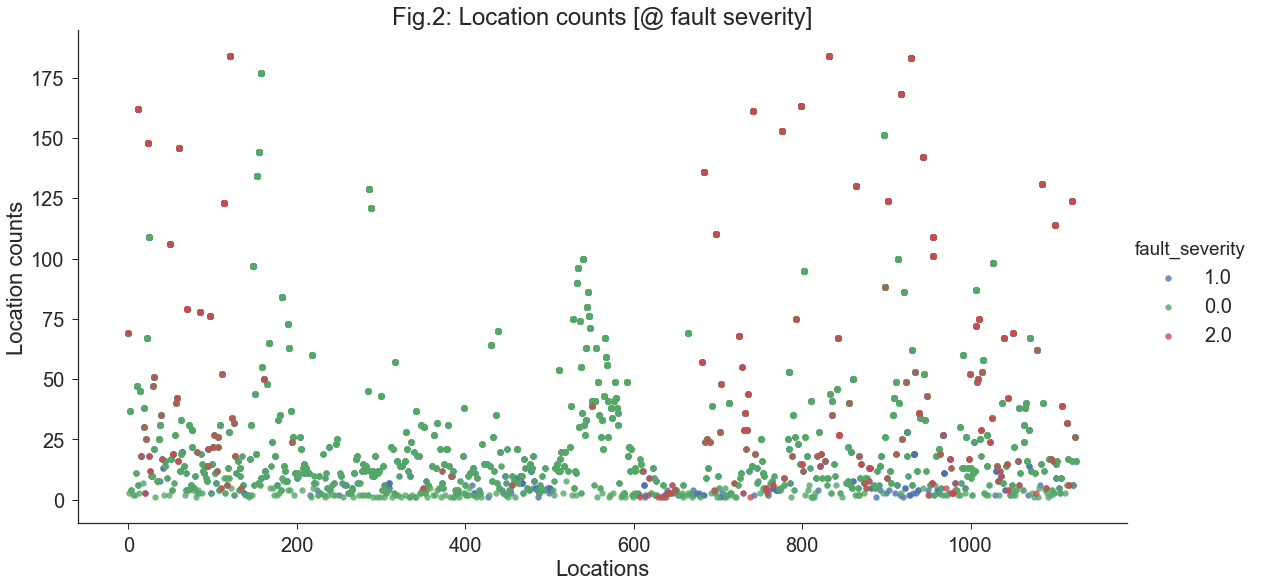

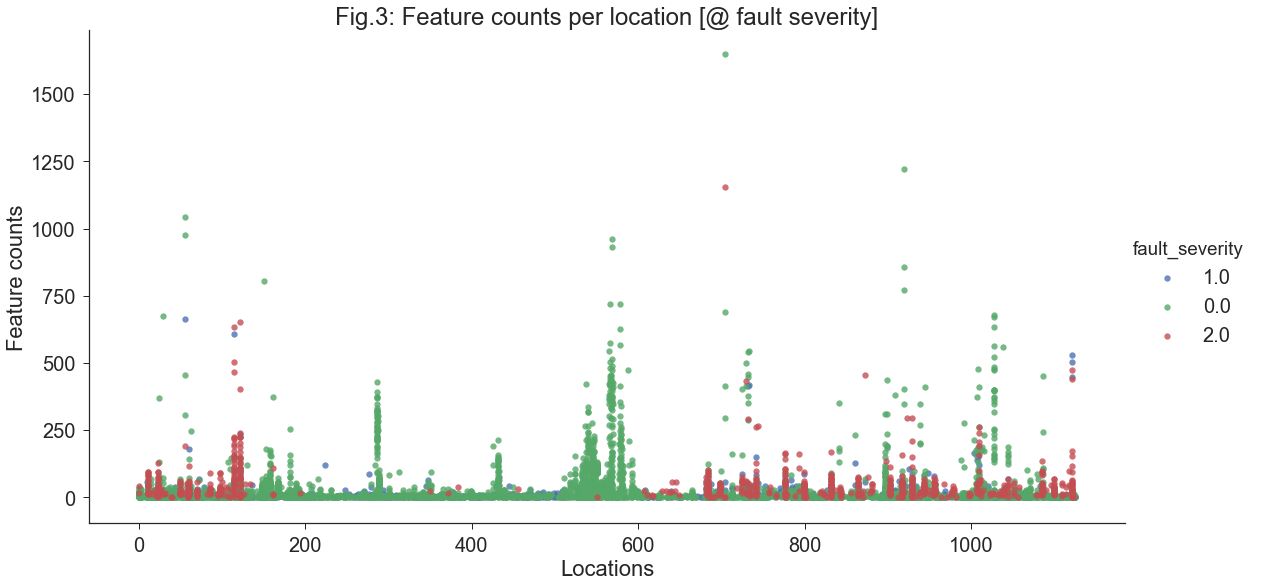

In [7]:
#train = pd.read_csv(_dir+'/'+'train.csv', nrows=7381)
#train.replace(regex=True,inplace=True, to_replace=r'\D',value=r'')
# Set style of scatterplot
sb.set_context("notebook", font_scale=2.0)
sb.set_style("ticks")

# Creating scatterplots of dataframe 'train'

sb.lmplot('location', 'id', data=train, fit_reg=False, 
           hue='fault_severity',
           scatter_kws={"marker": "D", "s": 40}, size=8, aspect=2) 
plt.title('Fig.1: Fault severity distribution [by ID]')
plt.xlabel('Locations')
plt.ylabel('User "ID"s')


#sb.set_context("notebook", font_scale=2.0)
#sb.set_style("ticks")

sb.lmplot('location', 'num_location', data=train, fit_reg=False, 
           hue='fault_severity',
           scatter_kws={"marker": "D", "s": 40}, size=8, aspect=2)
plt.title('Fig.2: Location counts [@ fault severity]')
plt.xlabel('Locations')
plt.ylabel('Location counts')

# sb.set_context("notebook", font_scale=2.0)
# sb.set_style("ticks")

#-----------------------------------
sb.lmplot('location', 'num_feature', data=train,fit_reg=False,  
          hue='fault_severity',  
          scatter_kws={"marker": "D", "s": 40}, size=8, aspect=2) 
plt.title('Fig.3: Feature counts per location [@ fault severity]')
plt.xlabel('Locations')
plt.ylabel('Feature counts')

### Selecting the features

This part is inspired by 

In [8]:
train['normalized'] = train.groupby('location')['num_location'].apply(lambda x: x / (x.max() + 1))
#.groupby('location')['fault_severity'].transform(lambda x: np.arange(x.shape[0])+1)
#print severity_type.head()
#print severity_type.tail()
print 'minimum label:', min(train.num_location), 'maximum label:', max(train.num_location)

#sev['numsh'] = sev.groupby('location')['num'].apply(lambda x: x / (x.max() + 1))
#sev.head()

minimum label: 1 maximum label: 184


### More features
Let's see if rearranging the features will reveals any pattern which is very important to improve and help our classifier/predictions. See this [reference](https://github.com/gereleth/kaggle-telstra/blob/master/Discovering%20the%20magic%20feature.ipynb) for a similar example.

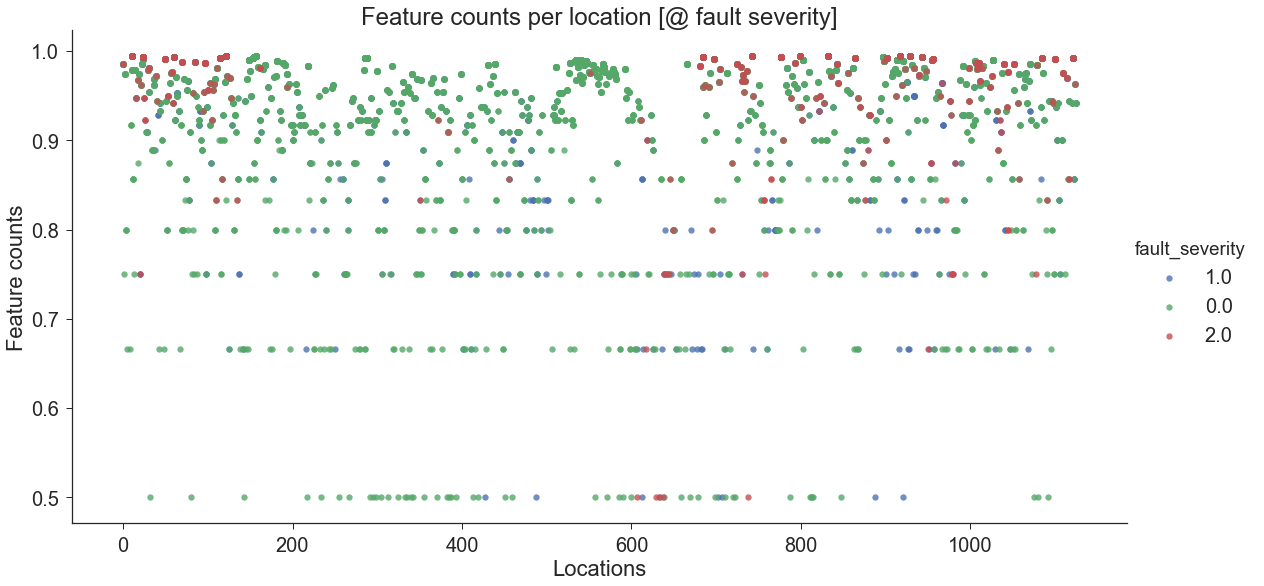

In [9]:
sb.set_context("notebook", font_scale=2.0)
sb.set_style("ticks")

# Create scatterplot of dataframe
sb.lmplot('location', # Horizontal axis
           'normalized', # Vertical axis
           data=train, # Data source
           fit_reg=False, # Don't fix a regression line
           hue='fault_severity', # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 40}, size=8, aspect=2) # S marker size
# Set title
plt.title('Feature counts per location [@ fault severity]')
# Set x-axis label
plt.xlabel('Locations')
# Set y-axis label
plt.ylabel('Feature counts')

### Selecting features 


We have now plenty of features to select from but there are still main common feature will be used in the training and the test sets. To mention here the difference between the training set and the test set is not on the 'fault severity' alone, in the test set we can basically use any mix of features. Below we select some feature for the training set while we intentionally use different set of features for the test set to examine our model accuracy.

In [10]:
train_selected_feature = ['fault_severity','id', 'location', 'num_feature', 'num_location',
                               'event_type 10','event_type 13',
                               'feature 101', 'feature 118',
                               'resource_type 1', 'resource_type 10', 'resource_type 4']

train.reindex(columns=train_selected_feature).to_csv(saved_data_dir+'/model_data/train_data.csv', sep='\t', encoding='utf-8', header=False)
print train.head()

   fault_severity     id  location  event_type 10  event_type 11  \
0             1.0  14121       148              0              0   
1             0.0   9320      1027              0              0   
2             1.0  14394       186              0              0   
3             1.0   8218      1051              0              1   
4             0.0  14804       151              0              1   

   event_type 13  event_type 14  event_type 15  event_type 18  event_type 2  \
0              0              0              0              0             0   
1              0              0              0              0             0   
2              0              0              0              0             0   
3              0              0              1              0             0   
4              0              0              0              0             0   

      ...      resource_type 8  resource_type 9  severity_type 1  \
0     ...                    0                0 

In [11]:
test_selected_feature = ['id', 'location', 'num_feature', 'num_location',
                         'event_type 50', 'event_type 54', 'event_type 6',
                         'feature 105', 'feature 179',
                         'resource_type 3', 'resource_type 9', 
                         'severity_type 1', 'severity_type 5']

test.reindex(columns=test_selected_feature).to_csv(saved_data_dir+'/model_data/test_data.csv', sep='\t', encoding='utf-8', header=False)
print test.head()

      id  location  event_type 10  event_type 11  event_type 13  \
0  11066       551              0              0              0   
1  18000      1085              0              1              0   
2  16964       562              0              0              0   
3   4795       608              1              0              0   
4   3392       684              0              0              0   

   event_type 14  event_type 15  event_type 18  event_type 2  event_type 20  \
0              0              0              0             0              0   
1              0              1              0             0              0   
2              0              0              0             0              0   
3              0              0              0             0              0   
4              0              1              0             0              0   

      ...       resource_type 7  resource_type 8  resource_type 9  \
0     ...                     0                0     